In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
import os


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline


RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)


os.makedirs('data', exist_ok=True)
os.makedirs('outputs', exist_ok=True)
os.makedirs('models', exist_ok=True)


'/Users/nipunnirman/Documents/GitHub/Dementia-Prediction-Machine-Learning-Model/data/Dementia Prediction Dataset copy.csv'

In [2]:
data_path = 'data/cleaned_data.csv'


df = pd.read_csv(data_path)




df.head()
 

,NACCID,NACCADC,PACKET,FORMVER,VISITMO,VISITDAY,VISITYR,NACCVNUM,NACCAVST,NACCNVST,NACCDAYS,NACCFDYS,BIRTHMO,BIRTHYR,NACCAGE,NACCAGEB,SEX,HISPANIC,HISPOR,HISPORX,RACE,RACEX,RACESEC,RACESECX,RACETER,RACETERX,NACCNIHR,PRIMLANG,PRIMLANX,EDUC,MARISTAT,NACCLIVS,INDEPEND,RESIDENC,HANDED,NACCREAS,NACCREFR,INBIRMO,INBIRYR,INSEX,NEWINF,INHISP,INHISPOR,INHISPOX,INRACE,INRACEX,INRASEC,INRASECX,INRATER,INRATERX,INEDUC,INRELTO,INRELTOX,INKNOWN,INLIVWTH,NACCFAM,NACCMOM,NACCFADM,NACCAM,NACCAMX,NACCAMS,NACCAMSX,NACCFFTD,NACCFM,NACCFMX,NACCFMS,NACCFMSX,NACCBMI,NACCUDSD,DEMENTED
0,NACC002909,186,I,3.0,12,28,2022,1,2,2,391.0,0.0,5,1952,70.0,70.0,1,0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1,NaN,16.0,1,4,1,1,2,7,2,5.0,1962.0,2.0,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,16.0,1.0,NaN,8.0,1.0,1.0,0.0,0,9.0,NaN,9.0,NaN,0,9.0,NaN,9.0,NaN,32.4,3,0
1,NACC002909,186,F,3.0,1,23,2024,2,2,2,391.0,391.0,5,1952,71.0,70.0,1,0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1,NaN,16.0,1,2,1,1,2,7,2,5.0,1962.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,0.0,0,9.0,NaN,9.0,NaN,0,9.0,NaN,9.0,NaN,30.7,3,0
2,NACC003487,186,I,3.0,11,15,2023,1,1,1,0.0,0.0,12,1956,66.0,66.0,1,0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1,NaN,16.0,1,2,1,1,2,7,2,3.0,1958.0,2.0,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,16.0,1.0,NaN,40.0,1.0,0.0,0.0,0,9.0,NaN,9.0,NaN,0,9.0,NaN,9.0,NaN,23.7,1,0
3,NACC004352,186,I,3.0,10,5,2021,1,1,1,0.0,0.0,1,1958,63.0,63.0,2,1,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,2,NaN,16.0,1,2,2,1,2,7,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,888.8,4,1
4,NACC004687,186,I,3.0,11,14,2022,1,1,1,0.0,0.0,2,1945,77.0,77.0,1,1,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1,NaN,12.0,3,1,1,1,2,1,2,2.0,1950.0,1.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,12.0,3.0,NaN,NaN,0.0,9.0,0.0,0,9.0,NaN,9.0,NaN,0,9.0,NaN,9.0,NaN,19.0,1,0


In [5]:
df.head()

,NACCID,NACCADC,PACKET,FORMVER,VISITMO,VISITDAY,VISITYR,NACCVNUM,NACCAVST,NACCNVST,NACCDAYS,NACCFDYS,BIRTHMO,BIRTHYR,NACCAGE,NACCAGEB,SEX,HISPANIC,HISPOR,HISPORX,RACE,RACEX,RACESEC,RACESECX,RACETER,RACETERX,NACCNIHR,PRIMLANG,PRIMLANX,EDUC,MARISTAT,NACCLIVS,INDEPEND,RESIDENC,HANDED,NACCREAS,NACCREFR,INBIRMO,INBIRYR,INSEX,NEWINF,INHISP,INHISPOR,INHISPOX,INRACE,INRACEX,INRASEC,INRASECX,INRATER,INRATERX,INEDUC,INRELTO,INRELTOX,INKNOWN,INLIVWTH,NACCFAM,NACCMOM,NACCFADM,NACCAM,NACCAMX,NACCAMS,NACCAMSX,NACCFFTD,NACCFM,NACCFMX,NACCFMS,NACCFMSX,NACCBMI,NACCUDSD,DEMENTED
0,NACC002909,186,I,3.0,12,28,2022,1,2,2,391.0,0.0,5,1952,70.0,70.0,1,0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1,NaN,16.0,1,4,1,1,2,7,2,5.0,1962.0,2.0,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,16.0,1.0,NaN,8.0,1.0,1.0,0.0,0,9.0,NaN,9.0,NaN,0,9.0,NaN,9.0,NaN,32.4,3,0
1,NACC002909,186,F,3.0,1,23,2024,2,2,2,391.0,391.0,5,1952,71.0,70.0,1,0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1,NaN,16.0,1,2,1,1,2,7,2,5.0,1962.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,0.0,0,9.0,NaN,9.0,NaN,0,9.0,NaN,9.0,NaN,30.7,3,0
2,NACC003487,186,I,3.0,11,15,2023,1,1,1,0.0,0.0,12,1956,66.0,66.0,1,0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1,NaN,16.0,1,2,1,1,2,7,2,3.0,1958.0,2.0,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,16.0,1.0,NaN,40.0,1.0,0.0,0.0,0,9.0,NaN,9.0,NaN,0,9.0,NaN,9.0,NaN,23.7,1,0
3,NACC004352,186,I,3.0,10,5,2021,1,1,1,0.0,0.0,1,1958,63.0,63.0,2,1,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,2,NaN,16.0,1,2,2,1,2,7,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,888.8,4,1
4,NACC004687,186,I,3.0,11,14,2022,1,1,1,0.0,0.0,2,1945,77.0,77.0,1,1,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1,NaN,12.0,3,1,1,1,2,1,2,2.0,1950.0,1.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,12.0,3.0,NaN,NaN,0.0,9.0,0.0,0,9.0,NaN,9.0,NaN,0,9.0,NaN,9.0,NaN,19.0,1,0


In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195196 entries, 0 to 195195
Data columns (total 70 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   NACCID    195196 non-null  object 
 1   NACCADC   195196 non-null  int64  
 2   PACKET    195196 non-null  object 
 3   FORMVER   195196 non-null  float64
 4   VISITMO   195196 non-null  int64  
 5   VISITDAY  195196 non-null  int64  
 6   VISITYR   195196 non-null  int64  
 7   NACCVNUM  195196 non-null  int64  
 8   NACCAVST  195196 non-null  int64  
 9   NACCNVST  195196 non-null  int64  
 10  NACCDAYS  195159 non-null  float64
 11  NACCFDYS  195135 non-null  float64
 12  BIRTHMO   195196 non-null  int64  
 13  BIRTHYR   195196 non-null  int64  
 14  NACCAGE   191600 non-null  float64
 15  NACCAGEB  193560 non-null  float64
 16  SEX       195196 non-null  int64  
 17  HISPANIC  195196 non-null  int64  
 18  HISPOR    13291 non-null   float64
 19  HISPORX   527 non-null     object 
 20  RACE

In [7]:
print(f"📋 All columns ({len(df.columns)} total):\n")
for i, col in enumerate(df.columns, 1):
    print(f"{i:4d}. {col}")

📋 All columns (70 total):

   1. NACCID
   2. NACCADC
   3. PACKET
   4. FORMVER
   5. VISITMO
   6. VISITDAY
   7. VISITYR
   8. NACCVNUM
   9. NACCAVST
  10. NACCNVST
  11. NACCDAYS
  12. NACCFDYS
  13. BIRTHMO
  14. BIRTHYR
  15. NACCAGE
  16. NACCAGEB
  17. SEX
  18. HISPANIC
  19. HISPOR
  20. HISPORX
  21. RACE
  22. RACEX
  23. RACESEC
  24. RACESECX
  25. RACETER
  26. RACETERX
  27. NACCNIHR
  28. PRIMLANG
  29. PRIMLANX
  30. EDUC
  31. MARISTAT
  32. NACCLIVS
  33. INDEPEND
  34. RESIDENC
  35. HANDED
  36. NACCREAS
  37. NACCREFR
  38. INBIRMO
  39. INBIRYR
  40. INSEX
  41. NEWINF
  42. INHISP
  43. INHISPOR
  44. INHISPOX
  45. INRACE
  46. INRACEX
  47. INRASEC
  48. INRASECX
  49. INRATER
  50. INRATERX
  51. INEDUC
  52. INRELTO
  53. INRELTOX
  54. INKNOWN
  55. INLIVWTH
  56. NACCFAM
  57. NACCMOM
  58. NACCFADM
  59. NACCAM
  60. NACCAMX
  61. NACCAMS
  62. NACCAMSX
  63. NACCFFTD
  64. NACCFM
  65. NACCFMX
  66. NACCFMS
  67. NACCFMSX
  68. NACCBMI
  69. NACCUDSD
 

In [9]:
NON_MEDICAL_FEATURES = {
    

    'visit_info': [
        'NACCID', 'NACCADC', 'PACKET', 'FORMVER',
        'VISITMO', 'VISITDAY', 'VISITYR',
        'NACCVNUM', 'NACCAVST', 'NACCNVST', 'NACCDAYS', 'NACCFDYS',
    ],
    
   
    'subject_demographics': [
        # Birth & Age
        'BIRTHMO', 'BIRTHYR', 'NACCAGE', 'NACCAGEB',
        # Sex
        'SEX',
        # Race & Ethnicity
        'HISPANIC', 'HISPOR', 'HISPORX',
        'RACE', 'RACEX', 'RACESEC', 'RACESECX', 'RACETER', 'RACETERX',
        'NACCNIHR',
        # Language
        'PRIMLANG', 'PRIMLANX',
        # Education - KEY PREDICTOR
        'EDUC',
        # Marital & Living - KEY PREDICTORS
        'MARISTAT', 'NACCLIVS', 'INDEPEND', 'RESIDENC',
        # Other
        'HANDED', 'NACCREAS', 'NACCREFR',
    ],
    
    # Co-participant Demographics (FORM A2)
    'coparticipant_demographics': [
        'INBIRMO', 'INBIRYR', 'INSEX', 'NEWINF',
        'INHISP', 'INHISPOR', 'INHISPOX',
        'INRACE', 'INRACEX', 'INRASEC', 'INRASECX', 'INRATER', 'INRATERX',
        'INEDUC', 'INRELTO', 'INRELTOX', 'INKNOWN', 'INLIVWTH',
    ],
    
    # Family History (FORM A3) - CRITICAL
    'family_history': [
        'NACCFAM', 'NACCMOM', 'NACCDAG', 'NACCFAD',
        'NACCFADM', 'NACCAM', 'NACCAMX', 'NACCAMS', 'NACCAMSX',
        'NACCFFTD', 'NACCFM', 'NACCFMX', 'NACCFMS', 'NACCFMSX',
    ],
    
    # Other NACC Derived
    'nacc_derived': [
        'NACCBMI', 'NACCUDSD',
    ],
}


ALL_NON_MEDICAL = []
for category, features in NON_MEDICAL_FEATURES.items():
    ALL_NON_MEDICAL.extend(features)


for category, features in NON_MEDICAL_FEATURES.items():
    print(f"  - {category}: {len(features)} features")

  - visit_info: 12 features
  - subject_demographics: 25 features
  - coparticipant_demographics: 18 features
  - family_history: 14 features
  - nacc_derived: 2 features


In [11]:
available_features = [f for f in ALL_NON_MEDICAL if f in df.columns]
missing_features = [f for f in ALL_NON_MEDICAL if f not in df.columns]


if missing_features:
    print(f"\n  Missing features (first 20):")
    for feat in missing_features[:20]:
        print(f"     - {feat}")

print(f"\nAvailable non-medical features:")
for i, feat in enumerate(available_features, 1):
    print(f"{i:3d}. {feat}")


  Missing features (first 20):
     - NACCDAG
     - NACCFAD

Available non-medical features:
  1. NACCID
  2. NACCADC
  3. PACKET
  4. FORMVER
  5. VISITMO
  6. VISITDAY
  7. VISITYR
  8. NACCVNUM
  9. NACCAVST
 10. NACCNVST
 11. NACCDAYS
 12. NACCFDYS
 13. BIRTHMO
 14. BIRTHYR
 15. NACCAGE
 16. NACCAGEB
 17. SEX
 18. HISPANIC
 19. HISPOR
 20. HISPORX
 21. RACE
 22. RACEX
 23. RACESEC
 24. RACESECX
 25. RACETER
 26. RACETERX
 27. NACCNIHR
 28. PRIMLANG
 29. PRIMLANX
 30. EDUC
 31. MARISTAT
 32. NACCLIVS
 33. INDEPEND
 34. RESIDENC
 35. HANDED
 36. NACCREAS
 37. NACCREFR
 38. INBIRMO
 39. INBIRYR
 40. INSEX
 41. NEWINF
 42. INHISP
 43. INHISPOR
 44. INHISPOX
 45. INRACE
 46. INRACEX
 47. INRASEC
 48. INRASECX
 49. INRATER
 50. INRATERX
 51. INEDUC
 52. INRELTO
 53. INRELTOX
 54. INKNOWN
 55. INLIVWTH
 56. NACCFAM
 57. NACCMOM
 58. NACCFADM
 59. NACCAM
 60. NACCAMX
 61. NACCAMS
 62. NACCAMSX
 63. NACCFFTD
 64. NACCFM
 65. NACCFMX
 66. NACCFMS
 67. NACCFMSX
 68. NACCBMI
 69. NACCUDSD


In [13]:
with open('outputs/available_nonmedical_features.txt', 'w') as f:
    f.write("Available Non-Medical Features\n")
    f.write("="*50 + "\n\n")
    for i, feat in enumerate(available_features, 1):
        f.write(f"{i:3d}. {feat}\n")



In [16]:
TARGET_CANDIDATES = [
    'DEMENTED',     # Binary: 0=Normal, 1=Demented
    'NORMCOG',      # Binary: 1=Normal cognition
    'NACCALZD',     # Alzheimer's disease
    'NACCALZP',     # Probable AD
    'CDRGLOB',      # CDR Global score
    'NACCCOGF',     # Cognitive status
]

TARGET = None


for candidate in TARGET_CANDIDATES:
    if candidate in df.columns:
        print(f"✓ Found: {candidate}")
        value_counts = df[candidate].value_counts()
        print(f"  Values: {value_counts.to_dict()}")
        print(f"  Missing: {df[candidate].isna().sum()} ({df[candidate].isna().sum()/len(df)*100:.1f}%)")
        print()
        
        if TARGET is None and candidate == 'DEMENTED':
            TARGET = candidate


if TARGET is None:
    for candidate in TARGET_CANDIDATES:
        if candidate in df.columns:
            TARGET = candidate
            break


if TARGET is None and 'CDRGLOB' in df.columns:
    print("⚙️  Creating binary target from CDRGLOB")
    print("   0 = Normal, 0.5+ = Impaired")
    df['DEMENTIA_BINARY'] = (df['CDRGLOB'] >= 0.5).astype(int)
    TARGET = 'DEMENTIA_BINARY'

if TARGET is None:
    print(" ERROR: Could not find target variable!")
else:
    print(f"\n Selected target: {TARGET}")
    print(f"   Distribution: {df[TARGET].value_counts().to_dict()}")

✓ Found: DEMENTED
  Values: {0: 137606, 1: 57590}
  Missing: 0 (0.0%)


 Selected target: DEMENTED
   Distribution: {0: 137606, 1: 57590}


In [19]:
df_work = df[available_features + [TARGET]].copy()


initial_count = len(df_work)
df_work = df_work[df_work[TARGET].notna()]
removed_count = initial_count - len(df_work)


print(f"   - Initial rows: {initial_count:,}")
print(f"   - Removed (missing target): {removed_count:,}")
print(f"   - Final rows: {len(df_work):,}")
print(f"   - Features: {len(available_features)}")
print(f"   - Target: {TARGET}")

   - Initial rows: 195,196
   - Removed (missing target): 0
   - Final rows: 195,196
   - Features: 69
   - Target: DEMENTED


In [20]:
print("📊 Basic Statistics:\n")
df_work.describe()

📊 Basic Statistics:



,NACCADC,FORMVER,VISITMO,VISITDAY,VISITYR,NACCVNUM,NACCAVST,NACCNVST,NACCDAYS,NACCFDYS,BIRTHMO,BIRTHYR,NACCAGE,NACCAGEB,SEX,HISPANIC,HISPOR,RACE,RACESEC,RACETER,NACCNIHR,PRIMLANG,EDUC,MARISTAT,NACCLIVS,INDEPEND,RESIDENC,HANDED,NACCREAS,NACCREFR,INBIRMO,INBIRYR,INSEX,NEWINF,INHISP,INHISPOR,INRACE,INRASEC,INRATER,INEDUC,INRELTO,INKNOWN,INLIVWTH,NACCFAM,NACCMOM,NACCFADM,NACCAM,NACCAMS,NACCFFTD,NACCFM,NACCFMS,NACCBMI,NACCUDSD,DEMENTED
count,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195159.000000,195135.000000,195196.000000,195196.000000,191600.000000,193560.000000,195196.000000,195196.000000,13291.000000,194364.000000,5255.000000,1111.000000,192637.000000,195196.000000,194222.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,181135.000000,181361.000000,186908.000000,137136.000000,61025.000000,5374.000000,59932.000000,1716.000000,295.000000,57161.000000,186908.000000,22669.000000,186908.000000,193126.000000,193126.000000,195196.000000,133246.000000,89148.000000,195196.000000,133246.000000,89244.000000,169285.000000,195196.000000,195196.000000
mean,4999.759252,2.355919,6.364260,15.437145,2014.374101,3.820965,6.641929,5.774811,2434.351549,1203.756958,6.534693,1939.533054,74.101628,70.930921,1.580996,0.101349,4.550523,1.843881,6.040723,3.944194,1.375390,1.177130,15.558804,1.777741,2.005036,1.535718,1.293008,1.977208,1.551313,3.474067,6.574765,1949.053848,1.662213,0.082057,0.203507,4.857648,2.597878,10.818765,12.281356,15.552317,1.942330,39.200626,0.599776,1.299897,0.558584,0.003786,5.989538,8.955063,0.007685,5.974588,8.923961,96.994689,2.278453,0.295037
std,2980.944552,0.698246,3.395659,8.606407,5.331593,3.100083,4.248845,3.955649,1778.087824,1305.128244,3.454612,11.795708,10.204920,9.787075,0.493397,0.583779,9.410450,5.376561,12.471645,9.313583,1.057554,0.929809,3.222440,1.290757,0.901166,0.966394,1.099664,0.599955,1.478140,3.041807,3.436665,14.371527,0.472957,0.274453,1.030694,9.927882,7.897316,18.034800,19.521978,2.838053,1.416907,17.907522,0.489945,2.337065,1.335408,0.061414,4.239706,0.556115,0.087325,4.238733,0.725878,235.331935,1.328041,0.456060
min,186.000000,1.000000,1.000000,1.000000,2005.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1896.000000,18.000000,18.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,9.600000,1.000000,0.000000
25%,2289.000000,2.000000,3.000000,8.000000,2010.000000,1.000000,3.000000,3.000000,1033.000000,0.000000,3.000000,1931.000000,68.000000,65.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,4.000000,1939.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,14.000000,1.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,9.000000,23.700000,1.000000,0.000000
50%,4967.000000,2.000000,6.000000,15.000000,2014.000000,3.000000,6.000000,5.000000,2155.000000,782.000000,7.000000,1939.000000,75.000000,71.000000,2.000000,0.000000,2.000000,1.000000,3.000000,2.000000,1.000000,1.000000,16.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,7.000000,1948.000000,2.000000,0.000000,0.000000,2.000000,1.000000,3.000000,3.000000,16.000000,1.000000,41.000000,1.000000,1.000000,0.000000,0.000000,9.000000,9.000000,0.000000,9.000000,9.000000,26.800000,2.000000,0.000000
75%,8361.000000,3.000000,9.000000,23.000000,2019.000000,5.000000,9.000000,8.000000,3678.000000,1842.000000,10.000000,1947.000000,81.000000,78.000000,2.000000,0.000000,4.000000,1.000000,3.000000,3.000000,1.000000,1.000000,18.000000,2.000000,2.000000,2.000000,1.000000,

In [21]:
print(f" Target Variable: {TARGET}\n")
print("Distribution:")
print(df_work[TARGET].value_counts())
print(f"\nPercentages:")
print(df_work[TARGET].value_counts(normalize=True) * 100)

 Target Variable: DEMENTED

Distribution:
DEMENTED
0    137606
1     57590
Name: count, dtype: int64

Percentages:
DEMENTED
0    70.496322
1    29.503678
Name: proportion, dtype: float64


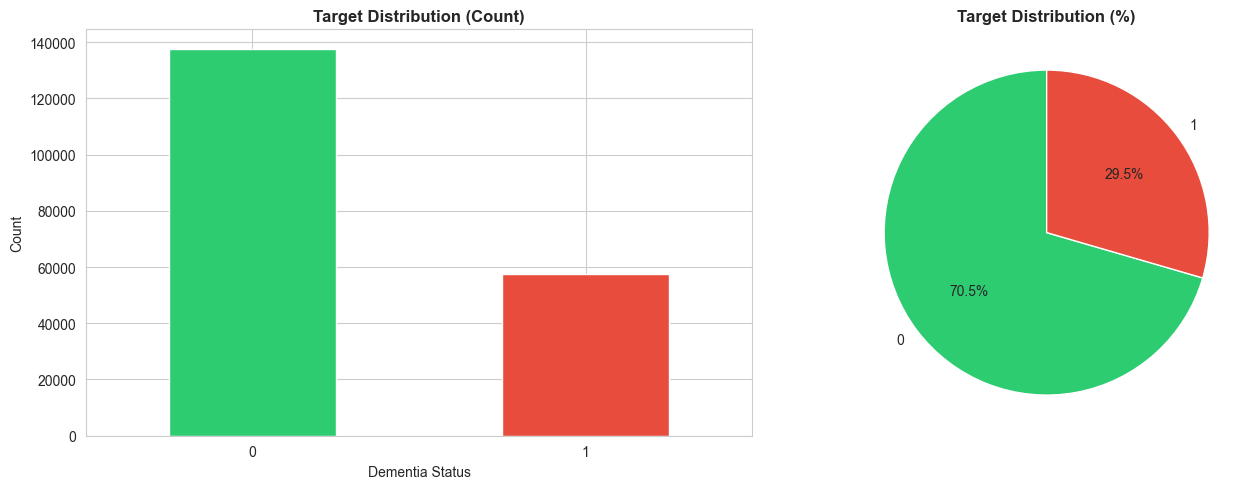

 Saved: outputs/01_target_distribution.png


In [22]:

fig, axes = plt.subplots(1, 2, figsize=(14, 5))


df_work[TARGET].value_counts().plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Target Distribution (Count)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Dementia Status')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)


df_work[TARGET].value_counts().plot(
    kind='pie', ax=axes[1], autopct='%1.1f%%',
    colors=['#2ecc71', '#e74c3c'], startangle=90
)
axes[1].set_title('Target Distribution (%)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.savefig('outputs/01_target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Saved: outputs/01_target_distribution.png")

In [23]:
class_balance = df_work[TARGET].value_counts(normalize=True)
min_class_pct = class_balance.min() * 100

print(f"\n⚖️  Class Balance Check:")
print(f"   Minority class: {min_class_pct:.1f}%")

if min_class_pct < 30:
    print(f"   ⚠️  WARNING: Class imbalance detected!")
    print(f"   Consider using SMOTE or class weights.")
else:
    print(f"   Classes are reasonably balanced.")


⚖️  Class Balance Check:
   Minority class: 29.5%
   ⚠️  WARNING: Class imbalance detected!
   Consider using SMOTE or class weights.


In [24]:
missing_stats = pd.DataFrame({
    'Column': df_work.columns,
    'Missing_Count': df_work.isnull().sum(),
    'Missing_Percentage': (df_work.isnull().sum() / len(df_work) * 100).round(2)
}).sort_values('Missing_Percentage', ascending=False)

print("\n Missing Values Summary:")
print(f"   Total cells: {df_work.shape[0] * df_work.shape[1]:,}")
print(f"   Missing cells: {df_work.isnull().sum().sum():,}")
print(f"   Overall missing: {(df_work.isnull().sum().sum() / (df_work.shape[0] * df_work.shape[1]) * 100):.2f}%")

print(f"\nTop 10 columns with missing data:")
print(missing_stats[missing_stats['Missing_Count'] > 0].head(10))


 Missing Values Summary:
   Total cells: 13,663,720
   Missing cells: 4,832,118
   Overall missing: 35.36%

Top 10 columns with missing data:
            Column  Missing_Count  Missing_Percentage
RACETERX  RACETERX         195160               99.98
INRATERX  INRATERX         195137               99.97
INHISPOX  INHISPOX         194958               99.88
INRASECX  INRASECX         194899               99.85
INRATER    INRATER         194901               99.85
RACESECX  RACESECX         194813               99.80
HISPORX    HISPORX         194669               99.73
RACETER    RACETER         194085               99.43
INRELTOX  INRELTOX         193644               99.20
INRACEX    INRACEX         193608               99.19


In [27]:
print("\n Data Types:")
print(df_work.dtypes.value_counts())

numerical_cols = df_work.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_work.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\n   - Numerical: {len(numerical_cols)}")
print(f"   - Categorical: {len(categorical_cols)}")


 Data Types:
float64    31
int64      23
object     16
Name: count, dtype: int64

   - Numerical: 54
   - Categorical: 16


In [29]:
summary = {
    'dataset_path': data_path,
    'total_rows': len(df),
    'total_columns': len(df.columns),
    'working_rows': len(df_work),
    'available_nonmedical_features': len(available_features),
    'target_variable': TARGET,
    'target_distribution': df_work[TARGET].value_counts().to_dict(),
    'class_balance': (df_work[TARGET].value_counts(normalize=True) * 100).to_dict(),
    'numerical_features': len(numerical_cols),
    'categorical_features': len(categorical_cols),
    'missing_percentage': round((df_work.isnull().sum().sum() / (df_work.shape[0] * df_work.shape[1]) * 100), 2)
}


with open('outputs/01_exploration_summary.txt', 'w') as f:
    f.write("Data Exploration Summary\n")
    f.write("="*70 + "\n\n")
    for key, value in summary.items():
        f.write(f"{key}: {value}\n")

print("\n Saved: outputs/01_exploration_summary.txt")
print("\n" + "="*70)
print(" EXPLORATION SUMMARY")
print("="*70)
for key, value in summary.items():
    print(f"  {key}: {value}")
print("="*70)


 Saved: outputs/01_exploration_summary.txt

 EXPLORATION SUMMARY
  dataset_path: data/cleaned_data.csv
  total_rows: 195196
  total_columns: 70
  working_rows: 195196
  available_nonmedical_features: 69
  target_variable: DEMENTED
  target_distribution: {0: 137606, 1: 57590}
  class_balance: {0: 70.49632164593537, 1: 29.503678354064633}
  numerical_features: 54
  categorical_features: 16
  missing_percentage: 35.36
